#  Keras for Deep Neural Networks
## Deep Neural Networks for Supervised Learning - Regression

In [6]:
#avoid Warnings
#very important
import warnings
warnings.filterwarnings("ignore")

In [9]:
#deep neural networks for supervised learning and it is here used for regression
#importing some data visualization libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

#Sklearn import library for splitting the data and Encoding of the Categorical variable


#if you want to split the data then use model_selection
from sklearn.model_selection import train_test_split


#Encoding the categorical variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Reading the data
df  = pd.read_csv("train.csv")

In [10]:
#printing the shape of the data
print("Shape of the Dataset:",df.shape)
#the head method displays the first 5 rows of the data
df.head(5)  

Shape of the Dataset: (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [12]:
#See the data carefully Date column can be interested for you

In [17]:
#It is very important for us to see the data types of all these columns
df.info()

#Very important to see the memory taken very large
#Very important to see that date is object and the State Holiday is also the object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
#checking the unique values
df["Store"].unique()

In [20]:
#It is not easy to merge two datasets and it merge according to some key column that is Store her

In [16]:
#importing the another dataset named as store
store  = pd.read_csv("store.csv")
print("Shape of the Dataset:",store.shape)

#Display the first 5 rows of data using the head method of pandas dataframe
store.head(5)

Shape of the Dataset: (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [19]:
store["Store"].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

# Metadata
*	**Store** - a unique Id for each store
*	**Sales** - the turnover for a given day (Our target y variable)
*	**Customers** - the number of customers on a given day
*	**Open** - an indicator for whether the store was open: 0 = closed, 1 = open
*	**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
*	**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
*	**StoreType** - differentiates between 4 different store models: a, b, c, d
*	**Assortment** - describes an assortment level: a = basic, b = extra, c = extended
*	**CompetitionDistance** - distance in meters to the nearest competitor store
*	**CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
*	**Promo **- indicates whether a store is running a promo on that day
*	**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
*	**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
*	**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


### Data Exploration

In [22]:
#Very very important step 
#See carefully the merging of the data
df_new = df.merge(store,on=["Store"], how="inner")
print(df_new.shape)

(1017209, 18)


In [23]:
print("Distinct number of Stores :", len(df_new["Store"].unique()))
print("Distinct number of Days :", len(df_new["Date"].unique()))
print("Average daily sales of all stores : ",round(df_new["Sales"].mean(),2))

Distinct number of Stores : 1115
Distinct number of Days : 942
Average daily sales of all stores :  5773.82


In [25]:
#Simply seeing the datatype 
df_new.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [26]:
#Value count of the day of the week
df_new["DayOfWeek"].value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

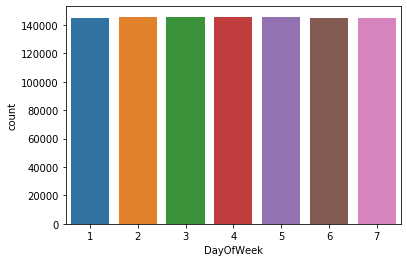

In [27]:
sns.countplot(df_new["DayOfWeek"])

In [30]:
#We can extract all date properties from a datetime datatype 
#As date object is very popular and you can do whatever you want
#And extract so much Properties from the date object

df_new["Date"] = pd.to_datetime(df_new["Date"])
#building the new_month column
df_new["Month"] = df_new["Date"].dt.month

#Building the Quarter column in intuition that may be date,month,quarter also affects the sale
df_new["Quarter"] = df_new["Date"].dt.quarter


#Building new Year column
df_new["Year"] = df_new["Date"].dt.year

#Building the day column
df_new["Day"] = df_new["Date"].dt.day


#Building the New Column Week 
df_new["Week"] = df_new["Date"].dt.week

#it is interesting that is Season
#This is what coding is just believe in it
df_new["Season"] = np.where(df_new["Month"].isin([3,4,5]),"Spring",
                        np.where(df_new["Month"].isin([6,7,8]),"Summer",
                            np.where(df_new["Month"].isin([9,10,11]),"Fall",
                                np.where(df_new["Month"].isin([12,1,2]),"Winter","None"))))


#Using the head command to view (only) the data and the newly engineered features
#It takes list as a parameter
print(df_new[["Date","Year","Month","Day","Week","Quarter","Season"]].head())


#Amazing stuff

        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


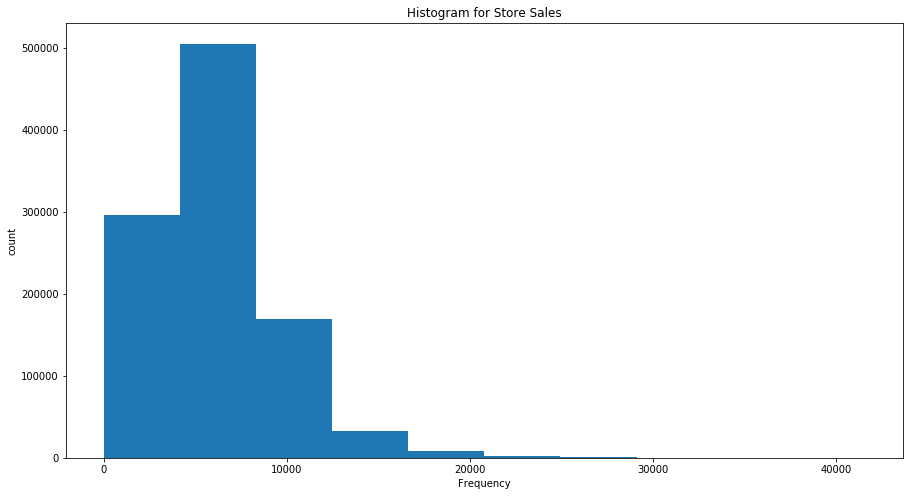

In [34]:
#some visualization
#Import matplotlib, python most popular data visualizing library
import matplotlib.pyplot as plt
%matplotlib inline

#Create a histogram to study the Daily Sales for the stores


#We just broke the code to understanf

#setting the plot size and check with changing the dimension length*breadth
plt.figure(figsize=(15,8)) 

#building the histogram
plt.hist(df_new["Sales"])

#Setting the title
plt.title("Histogram for Store Sales")

#setting the xaxis
plt.ylabel("count")

plt.xlabel("Frequency")
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb7a62fd10>,
      dtype=object)

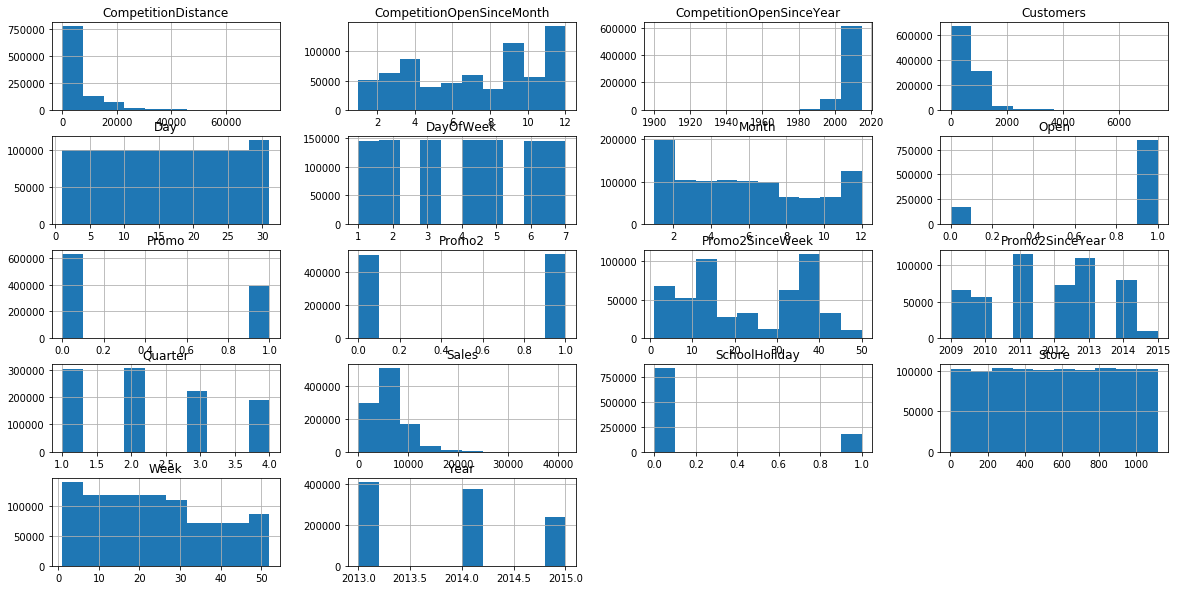

In [35]:
#Use the  histogram function provided by the Pandas object
#The function returns a cross-tab histogram plot for all numeric columns in the data
df_new.hist(figsize=(20,10))

In [36]:
#checking the null percentage value in each column
df_new.isnull().sum()/df_new.shape[0] * 100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

In [43]:
pp=df_new["CompetitionDistance"].mode()[0]
pp

250.0

In [44]:
#Replace nulls with the mode
#another important aspect to replace the null values
df_new["CompetitionDistance"]= df_new["CompetitionDistance"].fillna(df_new["CompetitionDistance"].mode()[0])

#Double check if we still see nulls for the column
df_new["CompetitionDistance"].isnull().sum()/df_new.shape[0] * 100


0.0

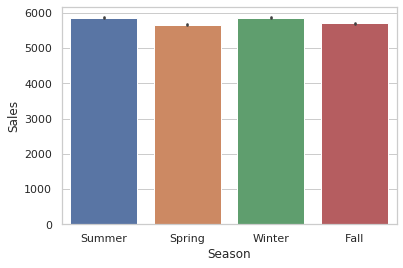

In [46]:
import seaborn as sns  #Seaborn is another powerful visulization library for Python
#setting the style of the plot
sns.set(style="whitegrid")

#Create the bar plot for Average Sales acrss different Seasons
ax = sns.barplot(x="Season", y="Sales", data=df_new)

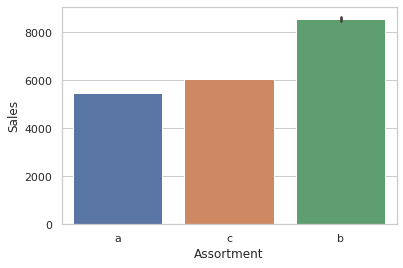

In [47]:
#Create the bar plot for Average Sales acrss different Assortments
ax = sns.barplot(x="Assortment", y="Sales", data=df_new) 

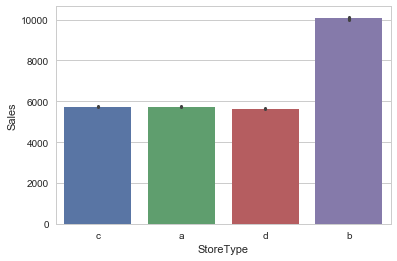

In [18]:
#Create the bar plot for Average Sales acrss different Store Types
ax = sns.barplot(x="StoreType", y="Sales", data=df_new) 

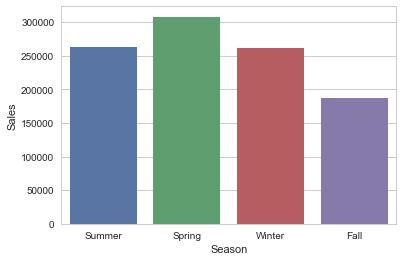

In [19]:
ax = sns.barplot(x="Season", y="Sales", data=df_new,estimator=np.size) 

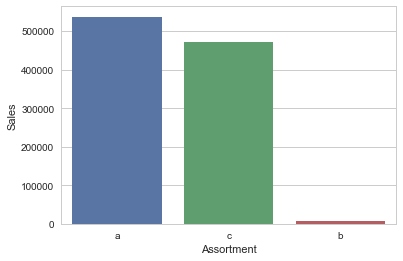

In [20]:
ax = sns.barplot(x="Assortment", y="Sales", data=df_new,estimator=np.size) 

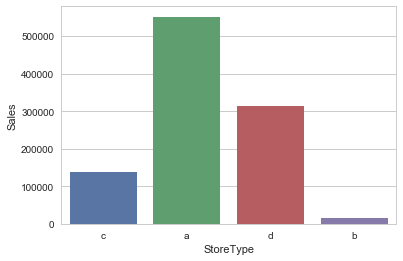

In [21]:
ax = sns.barplot(x="StoreType", y="Sales", data=df_new,estimator=np.size)

In [48]:
#So these are very basic visualization using seaborn

### Data Engineering

In [57]:
#Define a variable for each type of feature
target = ["Sales"]
numeric_columns = ["Customers","Open","Promo","Promo2","StateHoliday","SchoolHoliday","CompetitionDistance"]
categorical_columns = ["DayOfWeek","Quarter","Month","Year", "StoreType","Assortment","Season"]

#Define a function that will intake the raw dataframe and the column name and return a one hot encoded DF
def create_ohe(df, col):
    le = LabelEncoder()
    a=le.fit_transform(df_new[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

#Since the above function coverts the column, one at a time
#We create a loop to create the final dataset with all features
temp = df_new[numeric_columns]
for column in categorical_columns:
    temp_df = create_ohe(df_new,column)
    temp = pd.concat([temp,temp_df],axis=1)


In [56]:
le = LabelEncoder()
a=le.fit_transform(df_new["DayOfWeek"])#.reshape(-1,1)
a

array([4, 3, 2, ..., 3, 2, 1])

In [55]:
#Why reshaping is required...
#we have to check
le = LabelEncoder()
a=le.fit_transform(df_new["DayOfWeek"]).reshape(-1,1)
a

array([[4],
       [3],
       [2],
       ...,
       [3],
       [2],
       [1]])

In [58]:
#This is the difference

In [60]:
print("Shape of Data:",temp.shape)
print("Distinct Datatypes:",temp.dtypes.unique())

Shape of Data: (1017209, 44)
Distinct Datatypes: [dtype('int64') dtype('O') dtype('float64')]


In [61]:
print(temp.columns[temp.dtypes=="object"])

Index(['StateHoliday'], dtype='object')


In [64]:
#See the Unique values in StateHoliday
temp["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [67]:
#very elegant Code
#np.where(cond,this(if true),that(if false))
temp["StateHoliday"]= np.where(temp["StateHoliday"]== '0',0,1)
#One last check the data tpye
temp.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [68]:
#Create train and test dataset with an 80:20 split
x_train, x_test, y_train, y_test = train_test_split(temp,df_new[target],test_size=0.2,random_state=2018)


#Recommended to have a validation set
#Further divide training dataset into train and validation dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=2018)

#Check the sizes of all newly created datasets
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (732390, 44)
Shape of x_val: (81377, 44)
Shape of x_test: (203442, 44)
Shape of y_train: (732390, 1)
Shape of y_val: (81377, 1)
Shape of y_test: (203442, 1)


### Creating Baseline Accuracy

In [70]:
#calcualte the average score of the train dataset
mean_sales = y_train.mean()
print("Average Sales :",mean_sales) 

Average Sales : Sales    5773.099997
dtype: float64


In [72]:
#Calculate the Mean Absolute Error on the test dataset
#similarly as mode
#It is the base the error always less than this 
#otherwise the model is worst
print("MAE for Test Data:",abs(y_test - mean_sales).mean()[0])

MAE for Test Data: 2883.587604303215


### Designing the Deep Neural Network

In [73]:
#Create Deep Neural Network Architecuture
from keras import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))

#The input_dim =44, since the width of the training data=44 (refer data engg section)
model.add(Dense(1,activation = "linear"))

#Configure the model
model.compile(optimizer='adam', loss="mean_absolute_error", 
metrics=["mean_absolute_error"])

#Train the model
model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=10,batch_size=64)


Using TensorFlow backend.









Train on 732390 samples, validate on 81377 samples
Epoch 1/10





732390/732390 [==============================] - 39s 53us/step - loss: 959.4315 - mean_absolute_error: 959.4315 - val_loss: 833.5524 - val_mean_absolute_error: 833.5524
Epoch 2/10
732390/732390 [==============================] - 35s 48us/step - loss: 783.6886 - mean_absolute_error: 783.6886 - val_loss: 775.0494 - val_mean_absolute_error: 775.0494
Epoch 3/10
732390/732390 [==============================] - 36s 49us/step - loss: 740.9892 - mean_absolute_error: 740.9892 - val_loss: 722.7815 - val_mean_absolute_error: 722.7815
Epoch 4/10
732390/732390 [==============================] - 37s 50us/step - loss: 725.0020 - mean_absolute_error: 725.0020 - val_loss: 717.3946 - val_mean_absolute_error: 717.3946
Epoch 5/10
732390/732390 [==============================] - 38s 52us/step - loss: 712.8326 - mean_absolute_error: 712.8326 - val_loss: 705.1521 - val_mean_absolute_error: 705.1521
Epoch 6/10
732390/732390 [===========

In [74]:
#Use the model's evaluate method to predict and evaluate the test datasets
result = model.evaluate(x_test,y_test)

#Print the results
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

203442/203442 [==============================] - 7s 35us/step
Metric  loss : 679.95
Metric  mean_absolute_error : 679.95


In [75]:
#Check with increasing the layersed
#Make it more deep
model = Sequential()

#First
model.add(Dense(150,input_dim = 44,activation="relu"))
#second
model.add(Dense(150,activation="relu"))
#third
model.add(Dense(150,activation="relu"))
#Output Layer
model.add(Dense(1,activation = "linear"))

#Now you changed the loss metrics becuase mse reduce the chance of overfitting
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

history = model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=10,batch_size=64)

#result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))


Train on 732390 samples, validate on 81377 samples
Epoch 1/10
732390/732390 [==============================] - 56s 77us/step - loss: 1730326.2298 - mean_absolute_error: 854.6930 - val_loss: 1155579.4289 - val_mean_absolute_error: 731.2485
Epoch 2/10
732390/732390 [==============================] - 54s 74us/step - loss: 1158702.5870 - mean_absolute_error: 722.0426 - val_loss: 1087204.6053 - val_mean_absolute_error: 698.1841
Epoch 3/10
732390/732390 [==============================] - 56s 76us/step - loss: 1090597.9415 - mean_absolute_error: 700.1688 - val_loss: 995171.5983 - val_mean_absolute_error: 674.9657
Epoch 4/10
732390/732390 [==============================] - 55s 75us/step - loss: 1052701.5642 - mean_absolute_error: 688.6167 - val_loss: 1182423.3372 - val_mean_absolute_error: 726.8500
Epoch 5/10
732390/732390 [==============================] - 57s 78us/step - loss: 1033628.8522 - mean_absolute_error: 683.3768 - val_loss: 1008461.4373 - val_mean_absolute_error: 685.8052
Epoch 6/10

In [76]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=15,batch_size=64)

result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))
    
#there is not that much change in the error    

Train on 732390 samples, validate on 81377 samples
Epoch 1/15
732390/732390 [==============================] - 88s 120us/step - loss: 1745210.0183 - mean_absolute_error: 863.6423 - val_loss: 1259886.7146 - val_mean_absolute_error: 779.3278
Epoch 2/15
732390/732390 [==============================] - 85s 116us/step - loss: 1175268.9193 - mean_absolute_error: 727.3253 - val_loss: 1092955.3006 - val_mean_absolute_error: 696.0282
Epoch 3/15
732390/732390 [==============================] - 81s 111us/step - loss: 1108718.0051 - mean_absolute_error: 704.8262 - val_loss: 1239008.9041 - val_mean_absolute_error: 745.4879
Epoch 4/15
732390/732390 [==============================] - 83s 113us/step - loss: 1067666.6862 - mean_absolute_error: 691.6656 - val_loss: 1057535.6798 - val_mean_absolute_error: 686.9974
Epoch 5/15
732390/732390 [==============================] - 87s 119us/step - loss: 1042825.5231 - mean_absolute_error: 684.4119 - val_loss: 953991.5788 - val_mean_absolute_error: 660.2796
Epoch

In [78]:
model = Sequential()
model.add(Dense(350,input_dim = 44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=15,batch_size=64)

result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

#There is no effect so we are now moving forward to increase the number of neurons

Train on 732390 samples, validate on 81377 samples
Epoch 1/15
732390/732390 [==============================] - 93s 127us/step - loss: 1703608.0793 - mean_absolute_error: 851.9922 - val_loss: 1219310.6926 - val_mean_absolute_error: 759.2415
Epoch 2/15
732390/732390 [==============================] - 101s 138us/step - loss: 1166535.1209 - mean_absolute_error: 727.7498 - val_loss: 1103091.6112 - val_mean_absolute_error: 713.2152
Epoch 3/15
732390/732390 [==============================] - 97s 133us/step - loss: 1095504.5632 - mean_absolute_error: 703.1351 - val_loss: 1026560.0868 - val_mean_absolute_error: 681.1547
Epoch 4/15
732390/732390 [==============================] - 88s 120us/step - loss: 1057414.8962 - mean_absolute_error: 690.1719 - val_loss: 970060.3191 - val_mean_absolute_error: 670.8087
Epoch 5/15
732390/732390 [==============================] - 94s 128us/step - loss: 1031417.7432 - mean_absolute_error: 681.3776 - val_loss: 981687.8171 - val_mean_absolute_error: 672.9326
Epoch

### Training the model with increased number of epochs

In [77]:
#This time improving the number of epochs
from keras.callbacks import History 
history = History()

model = Sequential()
model.add(Dense(350,input_dim = 44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

model.fit(x_train,y_train, validation_data=(x_val,y_val), 
epochs=15,batch_size=64,callbacks=[history])

result = model.evaluate(x_test,y_test)

for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))


Train on 732390 samples, validate on 81377 samples
Epoch 1/15
732390/732390 [==============================] - 192s 262us/step - loss: 1672888.5935 - mean_absolute_error: 849.7389 - val_loss: 1232561.5426 - val_mean_absolute_error: 737.2873
Epoch 2/15
732390/732390 [==============================] - 190s 259us/step - loss: 1168932.5275 - mean_absolute_error: 724.4256 - val_loss: 1091853.9308 - val_mean_absolute_error: 694.5555
Epoch 3/15
732390/732390 [==============================] - 179s 245us/step - loss: 1105126.0068 - mean_absolute_error: 703.5753 - val_loss: 1049116.8730 - val_mean_absolute_error: 695.8596
Epoch 4/15
732390/732390 [==============================] - 190s 259us/step - loss: 1066218.1592 - mean_absolute_error: 691.5491 - val_loss: 990455.2421 - val_mean_absolute_error: 665.7577
Epoch 5/15
732390/732390 [==============================] - 188s 257us/step - loss: 1034542.6668 - mean_absolute_error: 681.5845 - val_loss: 994262.3015 - val_mean_absolute_error: 672.9285
E

### Visualing the final results

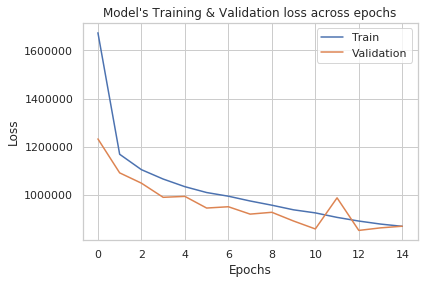

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [80]:
#Manually predicting from the model, instead of using model's evaluate function
y_test["Prediction"] = model.predict(x_test)
y_test.columns = ["Actual Sales","Predicted Sales"]
print(y_test.head(10))

#Manually predicting from the model, instead of using model's evaluate function
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE :",mean_squared_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))
print("MAE :",mean_absolute_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))

        Actual Sales  Predicted Sales
115563             0         0.657459
832654             0         0.657459
769112          2933      3354.924805
350588          8602      7647.027832
141556          6975      6411.233887
84435           9239      9179.060547
53018              0         0.657459
262419             0         0.657459
702267          5885      5946.315430
981431             0        78.067741
MSE : 861035.722953738
MAE : 626.7492930861604
